<a href="https://colab.research.google.com/github/Hyubbbb/EPOCH_LinearAlgebra/blob/main/j_Dahee/Chapter5_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# 5-3**



In [ ]:
import numpy as np

A = np.array([[1, 2], [3, 4]])

AT_A = np.dot(A.T, A)
A_AT = np.dot(A, A.T)

frobenius_AT_A = np.sum(AT_A**2)
frobenius_A_AT = np.sum(A_AT**2)

trace_AT_A = np.trace(AT_A)
trace_A_AT = np.trace(A_AT)

print(AT_A)
print(trace_AT_A)
print(frobenius_AT_A)

print(A_AT)
print(trace_A_AT)
print(frobenius_A_AT)

[[10 14]
 [14 20]]
30
892
[[ 5 11]
 [11 25]]
30
892


**# 5-4**

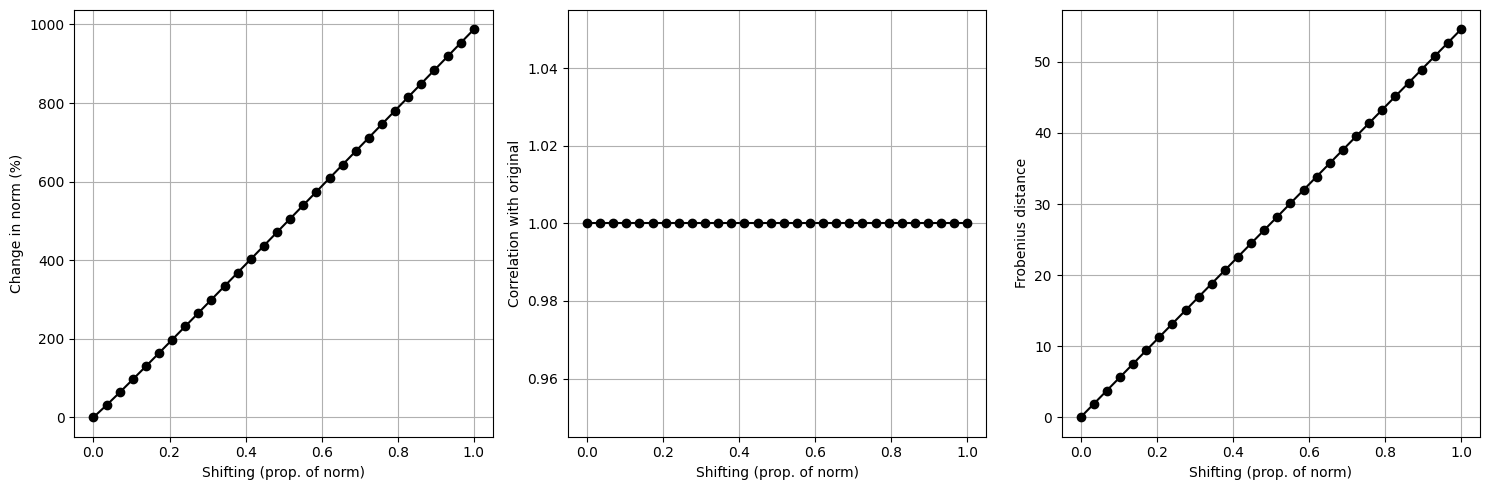

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Original matrix
A = np.random.rand(10, 10)
norm_A = np.linalg.norm(A, 'fro')

ratios = np.linspace(0, 1, 30)
norm_differences = []
frobenius_distances = []
correlations = []

for ratio in ratios:
    B = ratio * norm_A * np.ones_like(A)
    A_moved = A + B

    norm_A_moved = np.linalg.norm(A_moved, 'fro')
    norm_difference = 100 * (norm_A_moved - norm_A) / norm_A  # Convert to percentage
    norm_differences.append(norm_difference)

    frobenius_distance = np.linalg.norm(A_moved - A, 'fro')
    frobenius_distances.append(frobenius_distance)

    corr = np.corrcoef(A.flatten(), A_moved.flatten())[0, 1]
    correlations.append(corr)

# Initialize results matrices
shiftingResults = np.column_stack([norm_differences, correlations, frobenius_distances])
resultsNames = ['Change in norm (%)', 'Correlation with original', 'Frobenius distance']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    axs[i].plot(ratios, shiftingResults[:, i], 'o-', color='black')
    axs[i].set_xlabel('Shifting (prop. of norm)')
    axs[i].set_ylabel(resultsNames[i])
    axs[i].grid(True)  # Add grid for better readability

plt.tight_layout()
plt.savefig('Figure_05_06.png', dpi=300)
plt.show()

**# 5-5**

In [ ]:
M = 6
N = 9
r = 2

A = np.random.randn(M,r) @ np.random.randn(r,N)

print(A.shape)
print(np.linalg.matrix_rank(A))

(6, 9)
2


**# 5-6**

In [ ]:
import numpy as np

A = np.array([[1, 0], [0, 1]])
B = np.array([[2, 3], [4, 5]])
C = np.array([[6, 7], [8, 9]])

addition_1 = A + (B + C)
addition_2 = (A + B) + C

print(addition_1)
print(addition_2)
print(np.allclose(addition_1, addition_2))

[[ 9 10]
 [12 15]]
[[ 9 10]
 [12 15]]
True


In [ ]:
multiplication_1 = A @ (B + C)
multiplication_2 = (A @ B) + (A @ C)

multiplication_3 = (A @ B) @ C
multiplication_4 = A @ (B @ C)


print(multiplication_1)
print(multiplication_2)
print(np.allclose(multiplication_1, multiplication_2))

print(multiplication_3)
print(multiplication_4)
print(np.allclose(multiplication_3, multiplication_4))

[[ 8 10]
 [12 14]]
[[ 8 10]
 [12 14]]
True
[[36 41]
 [64 73]]
[[36 41]
 [64 73]]
True


**# 5-7**

In [35]:
def makeAmatrix(M,r):
  return np.random.randn(M,r) @ np.random.randn(r,M)

matSize = 20
rs = range(2,16)

Ranks = np.zeros((len(rs),len(rs),2))

for i in range(len(rs)):
  for j in range(len(rs)):

    S = makeAmatrix(matSize,rs[i]) + makeAmatrix(matSize,rs[j])
    M = makeAmatrix(matSize,rs[i]) @ makeAmatrix(matSize,rs[j])

    Ranks[i,j,0] = np.linalg.matrix_rank(S)
    Ranks[i,j,1] = np.linalg.matrix_rank(M)

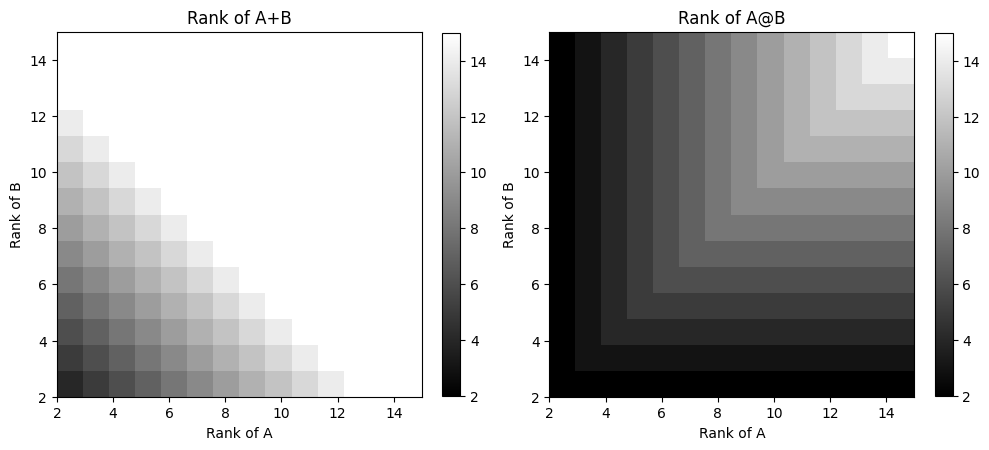

In [36]:
fig,axs = plt.subplots(1,2,figsize=(10,6))
s = '+@'

for i in range(2):

  h = axs[i].imshow(Ranks[:,:,i],vmin=np.min(rs),vmax=np.max(rs),origin='lower',
                    extent=(rs[0],rs[-1],rs[0],rs[-1]),cmap='gray')

  fig.colorbar(h,ax=axs[i],fraction=.045)
  axs[i].set_xlabel('Rank of A')
  axs[i].set_ylabel('Rank of B')
  axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_05_09.png',dpi=300)
plt.tight_layout()
plt.show()

**# 5-8**

In [22]:
M = 12
N = 7
r = 9

A   = np.random.randn(M,r) @ np.random.randn(r,N)
At  = A.T
AtA = A.T@A
AAt = A@A.T

print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

7 7 7 7


**# 5-9**

In [21]:
def is_V_inColA(A,v):


  if A.shape[0]!=v.shape[0]:
    raise Exception('Size mismatch! A and v must have the same column dimensionality!.')

  rankA  = np.linalg.matrix_rank(A)
  rankAv = np.linalg.matrix_rank( np.hstack((A,v)) )

  return rankA==rankAv


A = np.random.randn(4,3)
v = np.random.randn(4,1)

is_V_inColA(A,v)

False